In [1]:
import tensorflow as tf
import os
from scipy.special import softmax
from PIL import Image

In [8]:
!unzip -q "/content/drive/MyDrive/CV_project/data/안구질환/개_안구_정상_아픔_ttv.zip"

In [9]:
test_data = '/content/개_안구_정상_아픔_ttv/test'

In [3]:
model_path = '/content/drive/MyDrive/CV_project/안구질환_모델/Resnet_squared_all_정상_아픔.tf'
model = tf.keras.models.load_model(model_path)

In [4]:
# 라벨 한국어 번역
labels= [
    '아픔',
    '정상',
]

In [5]:
import numpy as np

In [6]:
def inference(file_path):
    img = Image.open(file_path)
    img = img.resize((224, 224))
    img = np.array(img)

    img = img / 255.
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img, verbose=0)
    return pred

In [25]:
predictions = {'target':[], 'pred':[], 'prob':[]}
for folder in os.listdir(test_data):
    print(folder)
    for file in os.listdir(os.path.join(test_data, folder)):
        pred = inference(os.path.join(test_data, folder, file))
        predictions['target'].append(folder)
        predictions['pred'].append(labels[1 if pred[0] > 0.5 else 0])
        predictions['prob'].append(pred.tolist())
        if len(predictions['target']) % 1000 == 0:
            print(len(predictions['target']), "predictions done")

정상
1000 predictions done
2000 predictions done
3000 predictions done
4000 predictions done
5000 predictions done
6000 predictions done
7000 predictions done
8000 predictions done
아픔
9000 predictions done
10000 predictions done
11000 predictions done
12000 predictions done
13000 predictions done
14000 predictions done
15000 predictions done
16000 predictions done
17000 predictions done
18000 predictions done
19000 predictions done


In [35]:
import os

base_dir = '/content/개_안구_정상_아픔_ttv'

for root, dirs, files in os.walk(base_dir):
    if root != base_dir:  # base_dir 자체는 제외
        num_images = sum(1 for file in files if file.endswith('.jpg') or file.endswith('.png'))  # jpg, png 이미지 확인
        print(f"{os.path.basename(root)}: {num_images} images")


train: 0 images
정상: 68111 images
아픔: 90956 images
test: 0 images
정상: 8515 images
아픔: 11365 images
val: 0 images
정상: 8513 images
아픔: 11368 images


In [26]:
from collections import Counter

Counter(predictions['target'])

Counter({'정상': 8515, '아픔': 11374})

In [27]:
Counter(predictions['pred'])

Counter({'정상': 8634, '아픔': 11255})

In [28]:
import unicodedata
target = [unicodedata.normalize('NFC', t) for t in predictions['target']]
predictions['target'] = target

In [29]:
pred = [unicodedata.normalize('NFC', p) for p in predictions['pred']]
predictions['pred'] = pred

In [30]:
predictions['prob']

[[[0.9998306035995483]],
 [[0.9876242876052856]],
 [[0.9988547563552856]],
 [[0.999987006187439]],
 [[0.999993085861206]],
 [[0.9918825030326843]],
 [[0.9976341724395752]],
 [[0.9943894743919373]],
 [[0.9999885559082031]],
 [[0.8217447400093079]],
 [[0.9958708882331848]],
 [[0.9993888139724731]],
 [[0.9727960228919983]],
 [[0.9762174487113953]],
 [[0.9999967813491821]],
 [[0.9754167199134827]],
 [[0.9988200068473816]],
 [[0.999679684638977]],
 [[0.9999898672103882]],
 [[0.9999992847442627]],
 [[0.9948516488075256]],
 [[0.9291518926620483]],
 [[0.9997342228889465]],
 [[0.9999874830245972]],
 [[0.3904556334018707]],
 [[0.9994958639144897]],
 [[0.9313881397247314]],
 [[0.9998192191123962]],
 [[0.9975008368492126]],
 [[0.9990535378456116]],
 [[0.9807515144348145]],
 [[0.9779196977615356]],
 [[0.9750303030014038]],
 [[0.9997554421424866]],
 [[0.9474685788154602]],
 [[0.9999995231628418]],
 [[0.9999804496765137]],
 [[0.9998575448989868]],
 [[0.9438731074333191]],
 [[0.8914512395858765]],
 [[

### D2 폰트 적용

In [31]:
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

font_files = font_manager.findSystemFonts(fontpaths='/content/drive/MyDrive/Pal-ette/D2Coding')
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rc('font', family='D2Coding')

### confusion matrix 생성 및 시각화

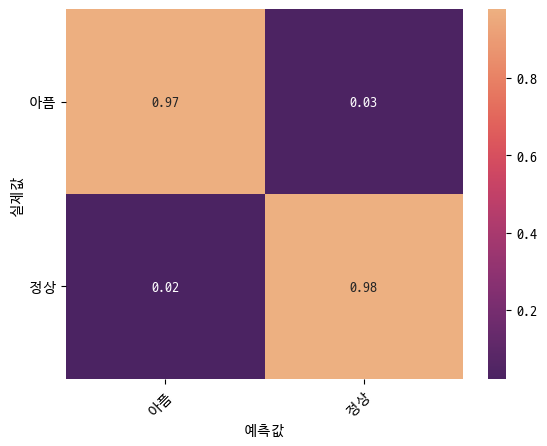

In [32]:
# confusion matrix 생성 및 시각화
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# confusion matrix 생성 및 시각화
cm = confusion_matrix(predictions['target'], predictions['pred'], normalize='true')
hm = sns.heatmap(cm, annot=True, fmt='.2f', cmap='flare_r')
hm.set_xlabel('예측값', fontsize=10)
hm.set_ylabel('실제값', fontsize=10)
hm.set_xticklabels(labels=labels, fontsize=10, rotation=45, ha='right', rotation_mode='anchor')
hm.set_yticklabels(labels=labels, fontsize=10, rotation=0)

plt.show()

In [34]:
from sklearn.metrics import classification_report

cr = classification_report(predictions['target'], predictions['pred'])
print(cr)

              precision    recall  f1-score   support

          아픔       0.98      0.97      0.98     11374
          정상       0.96      0.98      0.97      8515

    accuracy                           0.97     19889
   macro avg       0.97      0.97      0.97     19889
weighted avg       0.97      0.97      0.97     19889



In [18]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import numpy as np

legend = []

for i in range(len(labels)):
    target = np.array(predictions['target'])==i
    target = target.astype(int)
    probs = np.array(predictions['probs'])[:, i]

    precision, recall, thresholds = precision_recall_curve(target, probs)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision)
    legend.append(labels[i] + '(AUC = ' + str(round(pr_auc,4)) + ')')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(legend, loc='lower left')
plt.show()

KeyError: 'probs'